AnyDataWithGui
==============

Introduction
------------

AnyDataWithGui associate a GUI to any type, with associated GUI callbacks, allowing for custom rendering, editing, serialization, and event handling within the Fiatlight framework.

It uses callbacks which are stored inside [AnyDataGuiCallback](any_data_gui_callbacks.ipynb).

Signature
---------

Below, we display the class header, i.e., the class without its methods bodies, to give a quick overview of its structure.

You can see its full code at [AnyDataWithGui](https://github.com/pthom/fiatlight/blob/refact_io/src/python/fiatlight/fiat_core/any_data_with_gui.py).

In [1]:
from fiatlight.fiat_doc import look_at_code
%look_at_class_header fiatlight.fiat_core.AnyDataWithGui

class AnyDataWithGui(Generic[DataType]):
    """AnyDataWithGui: a GUI associated to a type.

    AnyDataWithGui[DataType]
    ========================

    This class manages data of any type with associated GUI callbacks, allowing for custom rendering, editing,
    serialization, and event handling within the Fiatlight framework.

    Members:
    --------
    # The type of the data, e.g. int, str, typing.List[int], typing.Tuple[int, str], typing.Optional[int], etc.
    _type: Type[DataType]

    # The value of the data - can be a DataType, Unspecified, or Error
    # It is accessed through the value property, which triggers the on_change callback (if set)
    _value: DataType | Unspecified | Error = UnspecifiedValue

    # Callbacks for the GUI
    # This is the heart of FiatLight: the GUI is defined by the callbacks.
    # Think of them as __dunder__ methods for the GUI.
    callbacks: AnyDataGuiCallbacks[DataType]

    # If True, the value can be None. This is useful when the data is optional.
    # Otherwise, any None value will be considered as an Error.
    # Note: when using Optional[any registered type], this flag is automatically set to True.
    can_be_none: bool = False

    Property:
    ---------
    # Custom attributes that can be set by the user, to give hints to the GUI.
    # For example, with this function declaration,
    #         def f(x: int, y: int) -> int:
    #             return x + y
    #        f.x__range = (0, 10)
    # fiat_attributes["range"] will be (0, 10) for the parameter x.
    @property
    fiat_attributes -> dict[str, Any]

    """
    _type: Type[DataType] | None
    _value: DataType | Unspecified | Error | Invalid[DataType] = UnspecifiedValue
    callbacks: AnyDataGuiCallbacks[DataType]
    can_be_none: bool = False
    _fiat_attributes: FiatAttributes
    _expanded: bool = False
    _can_set_unspecified_or_default: bool = False
    label: str | None = None
    label_color: ImVec4 | None = None
    tooltip: str | None = None
    status_tooltip: str | None = None

    class CollapseOrExpand(Enum):
        collapse = 'Collapse All'
        expand = 'Expand All'

    class PresentOrEdit(Enum):
        present = 'View'
        edit = 'Edit'

    class _Init_Section:
        """
        # ------------------------------------------------------------------------------------------------------------------
        #            Initialization
        # ------------------------------------------------------------------------------------------------------------------
        """
        pass

    def __init__(self, data_type: Type[DataType] | None) -> None:
        """Initialize the AnyDataWithGui with a type, an unspecified value, and no callbacks."""
        pass

    class _Value_Section:
        """
        # ------------------------------------------------------------------------------------------------------------------
        #            Value getter and setter + get_actual_value (which returns a DataType or raises an exception)
        # ------------------------------------------------------------------------------------------------------------------
        """
        pass

    @property
    def value(self) -> DataType | Unspecified | Error | Invalid[DataType]:
        """The value of the data, accessed through the value property.
        Warning: it might be an instance of `Unspecified` (user did not enter any value) or `Error` (an error was triggered)
        """
        pass

    @value.setter
    def value(self, new_value: DataType | Unspecified | Error | Invalid[DataType]) -> None:
        """Set the value of the data. This triggers the on_change callback (if set)"""
        pass

    def get_actual_value(self) -> DataType:
        """Returns the actual value of the data, or raises an exception if the value is Unspecified or Error or Invalid
        When we are inside a callback, we can be sure that the value is of the correct type, so we can call this method
        instead of acc

Architecture
------------

Below is a PlantUML diagram showing the architecture of the `fiat_core` module.
See the [architecture page](architecture) for the full architecture diagrams.

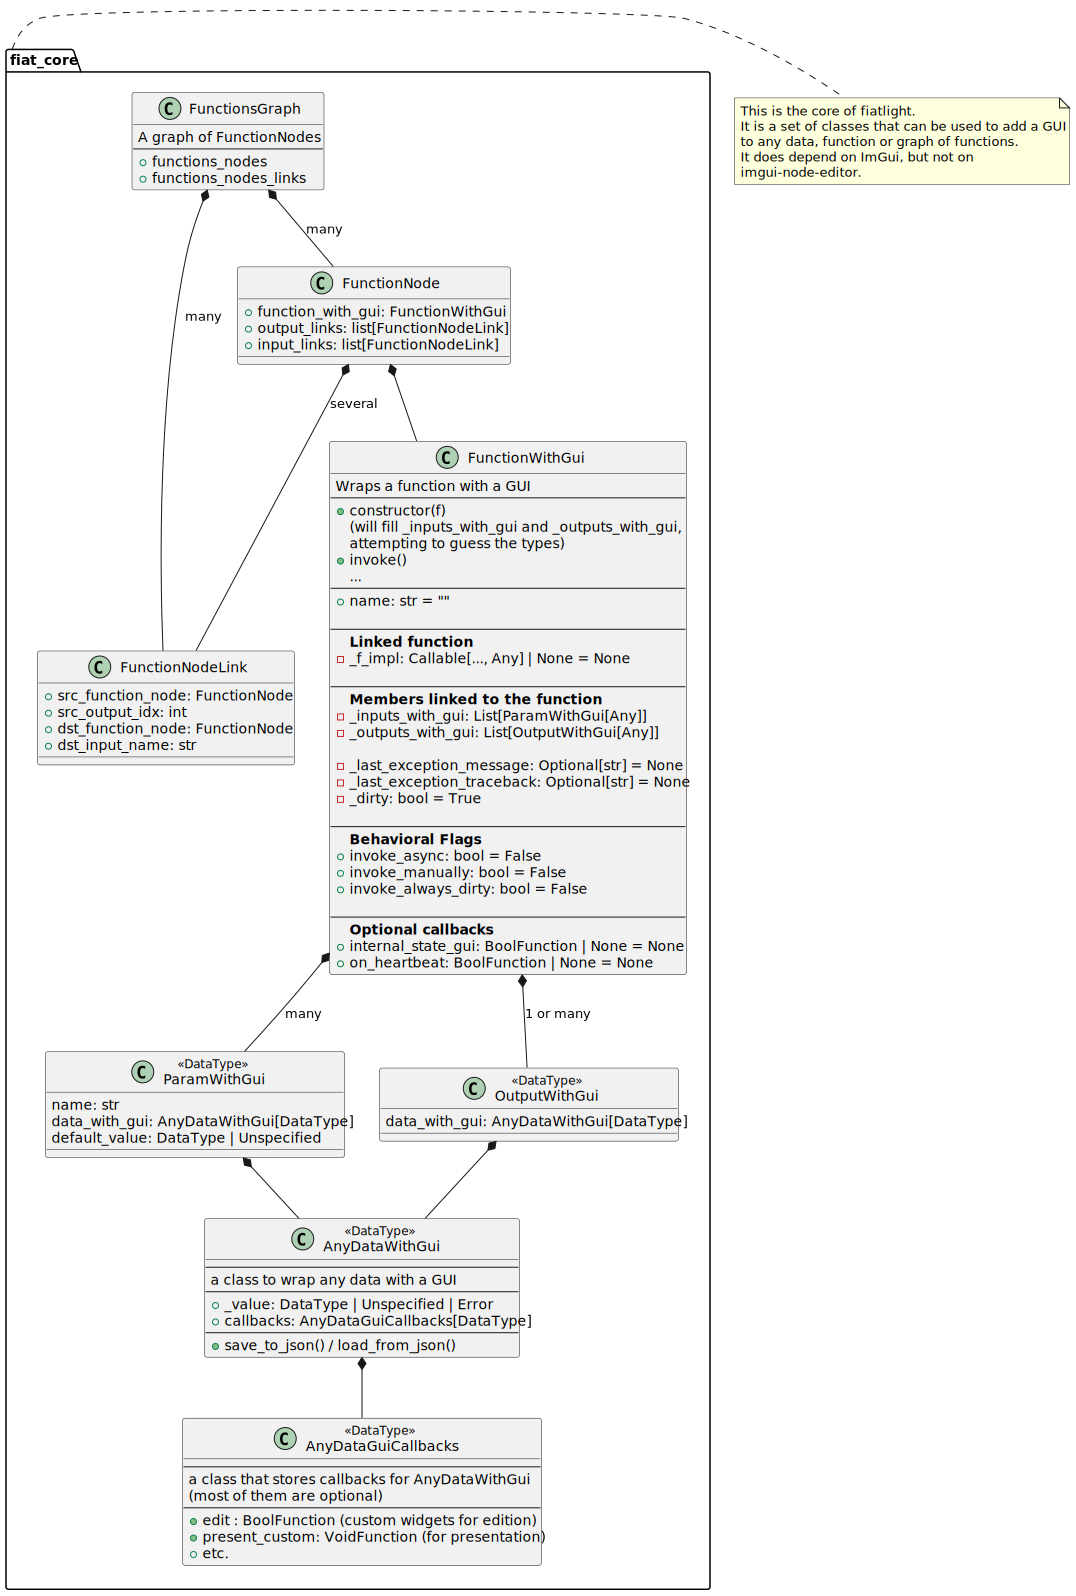

In [2]:
from fiatlight.fiat_doc import plantuml_magic
%plantuml_include class_diagrams/fiat_core.puml